# HW#8: Multi-class Classification

- 숙졔: Ex 13.4 three-class  classification 문제를 뉴럴네트워크로 해결하는 법 연습 
- 결과: three-class nonlinear classification 모델의 결과를 그림으로 표시
- 데이터: 아래 그림과 같이 2차원 평면상의 3개의 클래스가 두개의 동심원으로 구분되어 있음

## 데이터

In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import random_split
import matplotlib.pyplot as plt

In [2]:
datapath = './'
csvname = datapath + '3_layercake_data.csv'
data = np.loadtxt(csvname,delimiter = ',', dtype="float32")
x = data[:-1,:].T
y = data[-1:,:].T.astype(np.int64)
# assign categories
categories = y.squeeze(1)
# use colormap
colormap = np.array(['r', 'g', 'b'])

In [3]:
y.squeeze(1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

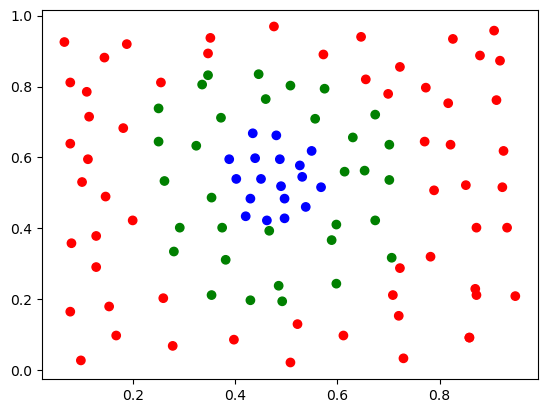

In [4]:
# Fixing random state for reproducibility
#colors = np.where(y.T == 1, 0.1, 0.8)
plt.scatter(x[:,0], x[:,1], c=colormap[categories])
plt.show()

## Sample Code

In [5]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import random_split
import matplotlib.pyplot as plt

## 데이터 

In [47]:
datapath = './'
csvname = datapath + '2eggs_data.csv'
data = np.loadtxt(csvname,delimiter = ',', dtype="float32")
x = data[:-1,:].T
y = data[-1:,:].T.astype(np.int64)
y = np.where(y == -1, 0, y)
mycol = np.where(y == 1, 'red', 'blue').squeeze(1)
x.shape

(96, 2)

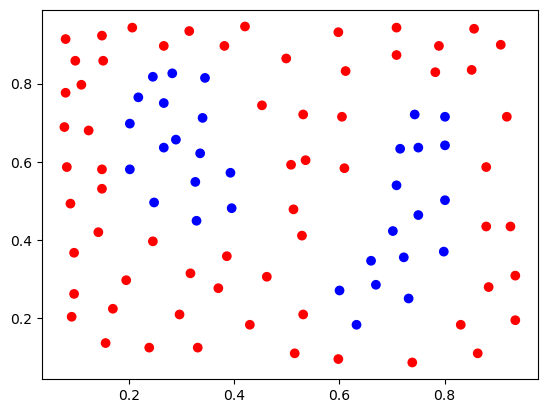

In [48]:
# Fixing random state for reproducibility
#colors = np.where(y.T == 1, 0.1, 0.8)
plt.scatter(x[:,0], x[:,1], c=mycol)
plt.show()

In [49]:
# shuffle data
t_d_in = torch.tensor(x)
t_d_out = torch.tensor(y)

#d_in = torch.tensor(d_in).unsqueeze(1) # 배치 입력을 위해 차원 추가, 예) 10 --> 10x1
#d_out = torch.tensor(d_out).unsqueeze(1) # 배치 입력을 위해 차원 추가, 예) 10 --> 10x1

n_samples = x.shape[0]  # 전체 입력 샘플수
n_val = int(0.2 * n_samples)  # validation용 입력 샘플수 
shuffled_indices = torch.randperm(n_samples) # 인덱스 셔플링 
train_indices = shuffled_indices[:-n_val]  # 학습용 인덱스 
val_indices = shuffled_indices[-n_val:]    # validation용 인덱스 

tr_in = t_d_in[train_indices] # 학습용 인덱스에 해당하는 입력데이터 
tr_out = t_d_out[train_indices].squeeze(1) # 학습용 인덱스에 해당하는 입력데이터

val_in = t_d_in[val_indices] # validation용 인덱스에 해당하는 입력데이터
val_out = t_d_out[val_indices].squeeze(1) # validation용 인덱스에 해당하는 출력데이터

In [50]:
val_out.dtype

torch.int64

In [51]:
seq_model = nn.Sequential(
            nn.Linear(2, 10), # <1>
            nn.Tanh(),
            nn.Linear(10, 10), # <1>
            nn.Tanh(),    
            nn.Linear(10, 10), # <1>
            nn.Tanh(),
            nn.Linear(10, 10), # <1>
            nn.Tanh(),
            nn.Linear(10, 2)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Tanh()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): Tanh()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): Tanh()
  (8): Linear(in_features=10, out_features=2, bias=True)
)

In [52]:
log_smax = nn.LogSoftmax(dim=1)

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(log_smax(t_p_train), t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(log_smax(t_p_val), t_c_val)
        
        optimizer.zero_grad()   # 모든 gradient를 0으로 초기화
        loss_train.backward()   # gradient 계산
        optimizer.step()        # 최적화 

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [53]:
tr_in.shape, val_in.shape, tr_out.shape, val_out.shape

(torch.Size([77, 2]), torch.Size([19, 2]), torch.Size([77]), torch.Size([19]))

In [54]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-1) # 주의: lr에 매우 민감. 여러 값 시도해 보도록

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.NLLLoss(),
    t_u_train = tr_in,
    t_u_val = val_in, 
    t_c_train = tr_out,
    t_c_val = val_out)
    
print('output', seq_model(val_in))
print('answer', val_out)
#print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 0.7352, Validation loss 0.7390
Epoch 1000, Training loss 0.6255, Validation loss 0.6239
Epoch 2000, Training loss 0.4801, Validation loss 0.6067
Epoch 3000, Training loss 0.2857, Validation loss 0.5017
Epoch 4000, Training loss 0.1817, Validation loss 0.6306
Epoch 5000, Training loss 0.0563, Validation loss 1.0164
output tensor([[-0.9633,  1.4797],
        [ 1.2396, -0.4898],
        [-2.2423,  1.2639],
        [-3.9753,  2.8856],
        [ 3.1098, -2.4085],
        [ 1.2605, -1.7973],
        [-1.0616,  0.5826],
        [-2.4495,  2.9558],
        [-5.0780,  5.3532],
        [-4.4057,  4.5472],
        [-1.5591,  1.4133],
        [ 1.1150, -1.3072],
        [-3.8369,  2.7857],
        [-1.8524,  2.4021],
        [-7.0004,  5.9346],
        [ 1.3014, -0.7936],
        [ 1.4491, -2.0297],
        [ 0.7475, -0.0824],
        [-3.6303,  3.9919]], grad_fn=<AddmmBackward0>)
answer tensor([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])


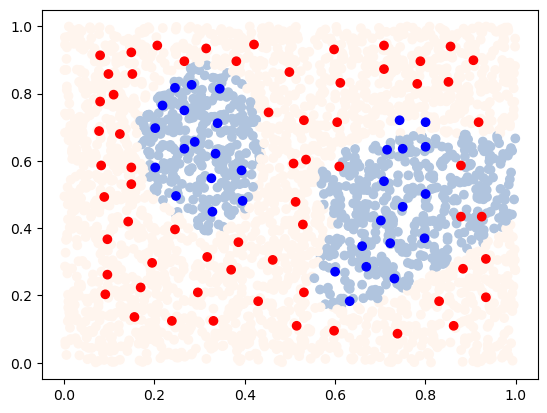

In [56]:
from matplotlib import pyplot as plt

#t_range = torch.arange(0.0, 1.0,0.01).unsqueeze(1)

# Fixing random state for reproducibility
#colors = np.where(y.T == 1, 0.1, 0.8)
test_data = torch.rand([3000,2])

m = nn.Softmax(dim=1)
pred = torch.argmax(m(seq_model(test_data)), dim=1)

test_data.numpy()
pred = pred.detach().numpy()
mycol2 = np.where(pred == 1, 'seashell', 'lightsteelblue')

plt.scatter(test_data[:,0], test_data[:,1],  c=mycol2)
plt.scatter(x[:,0], x[:,1],  c=mycol)

plt.show()

## 과제

In [57]:
datapath = './'
csvname = datapath + '3_layercake_data.csv'
data = np.loadtxt(csvname,delimiter = ',', dtype="float32")
x = data[:-1,:].T
y = data[-1:,:].T.astype(np.int64)
# assign categories
categories = y.squeeze(1)
# use colormap
colormap = np.array(['r', 'g', 'b'])

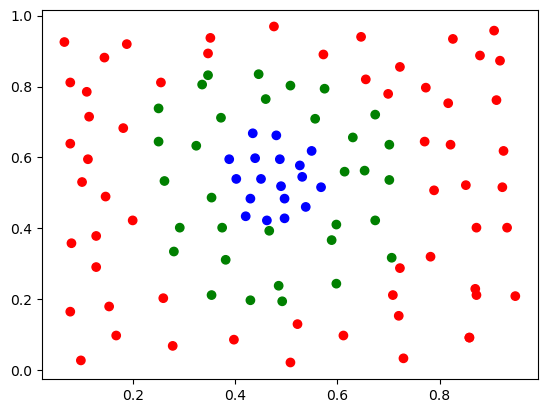

In [58]:
plt.scatter(x[:,0], x[:,1], c=colormap[categories])
plt.show()

In [59]:
# shuffle data
t_d_in = torch.tensor(x)
t_d_out = torch.tensor(y)

#d_in = torch.tensor(d_in).unsqueeze(1) # 배치 입력을 위해 차원 추가, 예) 10 --> 10x1
#d_out = torch.tensor(d_out).unsqueeze(1) # 배치 입력을 위해 차원 추가, 예) 10 --> 10x1

n_samples = x.shape[0]  # 전체 입력 샘플수
n_val = int(0.2 * n_samples)  # validation용 입력 샘플수 
shuffled_indices = torch.randperm(n_samples) # 인덱스 셔플링 
train_indices = shuffled_indices[:-n_val]  # 학습용 인덱스 
val_indices = shuffled_indices[-n_val:]    # validation용 인덱스 

tr_in = t_d_in[train_indices] # 학습용 인덱스에 해당하는 입력데이터 
tr_out = t_d_out[train_indices].squeeze(1) # 학습용 인덱스에 해당하는 입력데이터

val_in = t_d_in[val_indices] # validation용 인덱스에 해당하는 입력데이터
val_out = t_d_out[val_indices].squeeze(1) # validation용 인덱스에 해당하는 출력데이터

In [60]:
val_out.dtype

torch.int64

In [61]:
seq_model = nn.Sequential(
            nn.Linear(2, 10), # <1>
            nn.Tanh(),
            nn.Linear(10, 10), # <1>
            nn.Tanh(),    
            nn.Linear(10, 10), # <1>
            nn.Tanh(),
            nn.Linear(10, 10), # <1>
            nn.Tanh(),
            nn.Linear(10, 3)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Tanh()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): Tanh()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): Tanh()
  (8): Linear(in_features=10, out_features=3, bias=True)
)

In [62]:
log_smax = nn.LogSoftmax(dim=1)

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(log_smax(t_p_train), t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(log_smax(t_p_val), t_c_val)
        
        optimizer.zero_grad()   # 모든 gradient를 0으로 초기화
        loss_train.backward()   # gradient 계산
        optimizer.step()        # 최적화 

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [63]:
tr_in.shape, val_in.shape, tr_out.shape, val_out.shape

(torch.Size([88, 2]), torch.Size([22, 2]), torch.Size([88]), torch.Size([22]))

In [64]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-1) # 주의: lr에 매우 민감. 여러 값 시도해 보도록

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.NLLLoss(),
    t_u_train = tr_in,
    t_u_val = val_in, 
    t_c_train = tr_out,
    t_c_val = val_out)
    
print('output', seq_model(val_in))
print('answer', val_out)
#print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.0954, Validation loss 1.0926
Epoch 1000, Training loss 0.9889, Validation loss 0.9986
Epoch 2000, Training loss 0.8667, Validation loss 0.9495
Epoch 3000, Training loss 0.1693, Validation loss 0.0917
Epoch 4000, Training loss 0.0267, Validation loss 0.0971
Epoch 5000, Training loss 0.0178, Validation loss 0.2279
output tensor([[  4.8969,   2.6052,  -7.0962],
        [  8.0781,   0.9487,  -8.6278],
        [ 10.2560,   0.5821, -10.2081],
        [ -7.3141,   1.5846,   6.2596],
        [  6.9762,   1.4882,  -8.0781],
        [  5.6390,   2.9443,  -7.5346],
        [ -1.8426,   6.2832,  -3.8594],
        [  9.5139,   0.9653,  -9.7148],
        [ -7.7919,   0.9893,   7.3343],
        [ -7.7550,   1.0620,   7.2087],
        [ -0.1555,   5.7997,  -4.6788],
        [ -3.2127,   6.1650,  -2.0062],
        [  4.3834,   2.9314,  -6.9006],
        [  8.5407,   0.7166,  -8.8608],
        [  7.3844,   2.0007,  -8.4271],
        [  5.5146,   2.9786,  -7.7670],
        [  2.2

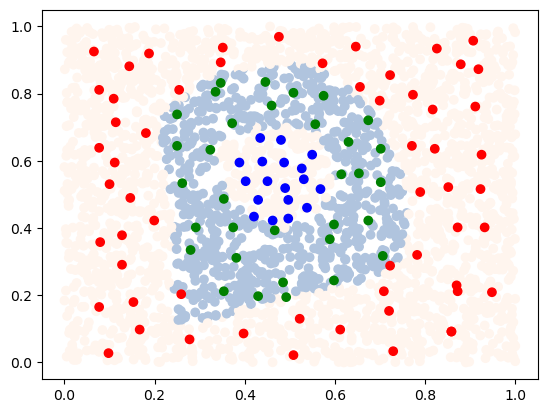

In [65]:
from matplotlib import pyplot as plt

#t_range = torch.arange(0.0, 1.0,0.01).unsqueeze(1)

# Fixing random state for reproducibility
#colors = np.where(y.T == 1, 0.1, 0.8)
test_data = torch.rand([3000,2])

m = nn.Softmax(dim=1)
pred = torch.argmax(m(seq_model(test_data)), dim=1)

test_data.numpy()
pred = pred.detach().numpy()
mycol2 = np.where(pred == 1, 'lightsteelblue', 'seashell')

plt.scatter(test_data[:,0], test_data[:,1],  c=mycol2)
plt.scatter(x[:,0], x[:,1],  c=colormap[categories])

plt.show()